In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

In [4]:
# Load the dataset
df = pd.read_csv('complete.csv')

# Display the first few rows of the dataframe
print(df.head())

       ID               name                     full_name  \
0   20801  Cristiano Ronaldo  C. Ronaldo dos Santos Aveiro   
1  158023           L. Messi                  Lionel Messi   
2  190871             Neymar    Neymar da Silva Santos Jr.   
3  176580          L. Suárez                   Luis Suárez   
4  167495           M. Neuer                  Manuel Neuer   

                  club                                club_logo  special  age  \
0       Real Madrid CF  https://cdn.sofifa.org/18/teams/243.png     2228   32   
1         FC Barcelona  https://cdn.sofifa.org/18/teams/241.png     2158   30   
2  Paris Saint-Germain   https://cdn.sofifa.org/18/teams/73.png     2100   25   
3         FC Barcelona  https://cdn.sofifa.org/18/teams/241.png     2291   30   
4     FC Bayern Munich   https://cdn.sofifa.org/18/teams/21.png     1493   31   

                     league  birth_date  height_cm  ...  prefers_cb  \
0  Spanish Primera División  1985-02-05      185.0  ...       False  

In [5]:
# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns


In [6]:
# Select relevant columns
columns_of_interest = ['potential', 'pac', 'sho', 'pas', 'dri', 'phy', 'age', 'international_reputation', 'skill_moves', 'weak_foot', 'overall']
df = df[columns_of_interest]

# Display the shape of the dataframe
print("Shape of the dataframe:", df.shape)

Shape of the dataframe: (17994, 11)


In [7]:
# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or 'most_frequent'
df[df.columns] = imputer.fit_transform(df[df.columns])

# Check for any remaining missing values
print("Missing values after imputation:\n", df.isnull().sum())

Missing values after imputation:
 potential                   0
pac                         0
sho                         0
pas                         0
dri                         0
phy                         0
age                         0
international_reputation    0
skill_moves                 0
weak_foot                   0
overall                     0
dtype: int64


In [8]:
# Create target variable based on 'overall' ratings
def classify_overall(overall):
    if overall <= 59:
        return 'Low'
    elif 60 <= overall <= 74:
        return 'Medium'
    else:
        return 'High'

df['target'] = df['overall'].apply(classify_overall)

# Drop the 'overall' column as it's no longer needed
df = df.drop(columns=['overall'])

print("Target variable created.")

Target variable created.


In [9]:
# Normalize the data using StandardScaler
# Exclude the 'target' column which contains string values
scaler = StandardScaler()
numerical_features = df.select_dtypes(include=['number']).columns  # Select only numerical columns
df_scaled = scaler.fit_transform(df[numerical_features])

# Convert the scaled data back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=numerical_features)

# Add the 'target' column back to the scaled dataframe
df_scaled['target'] = df['target']

# Display the first few rows of the scaled dataframe
print(df_scaled.head())

   potential       pac       sho       pas       dri       phy       age  \
0   3.748796  2.035232  2.856478  2.337819  2.641270  1.577350  1.490016   
1   3.584372  1.943802  2.639611  2.719990  3.219467 -0.390070  1.056862   
2   3.748796  2.218092  2.205878  2.051190  3.123101 -0.493619 -0.026022   
3   3.419949  1.303793  2.639611  2.051190  2.352172  1.680899  1.056862   
4   3.419949  2.126662  2.639611  3.579874  2.544904  2.716383  1.273439   

   international_reputation  skill_moves  weak_foot target  
0                  9.615085     3.594754   1.589912   High  
1                  9.615085     2.254292   1.589912   High  
2                  9.615085     3.594754   3.102568   High  
3                  9.615085     2.254292   1.589912   High  
4                  9.615085    -1.767095   1.589912   High  


In [10]:
# Step 7: Save the Modified Dataset to a CSV file
df_scaled.to_csv('modified_dataset.csv', index=False)

print("Modified dataset saved as 'modified_dataset.csv'.")

Modified dataset saved as 'modified_dataset.csv'.


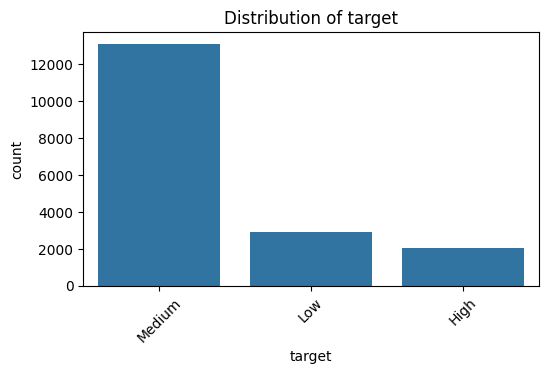

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
# Analyzing the distribution of categorical features using count plots
# Identifying categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Setting up the plot
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


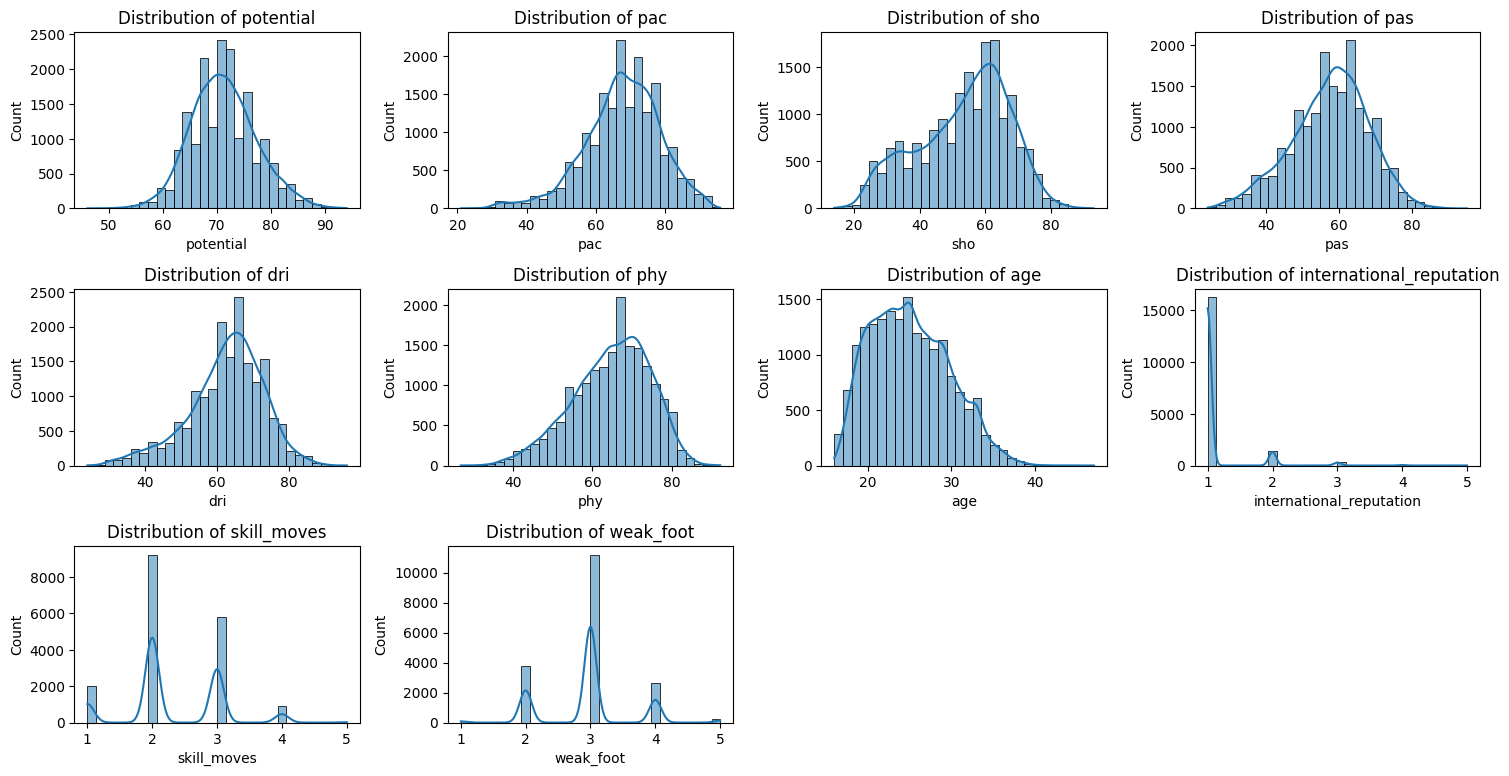

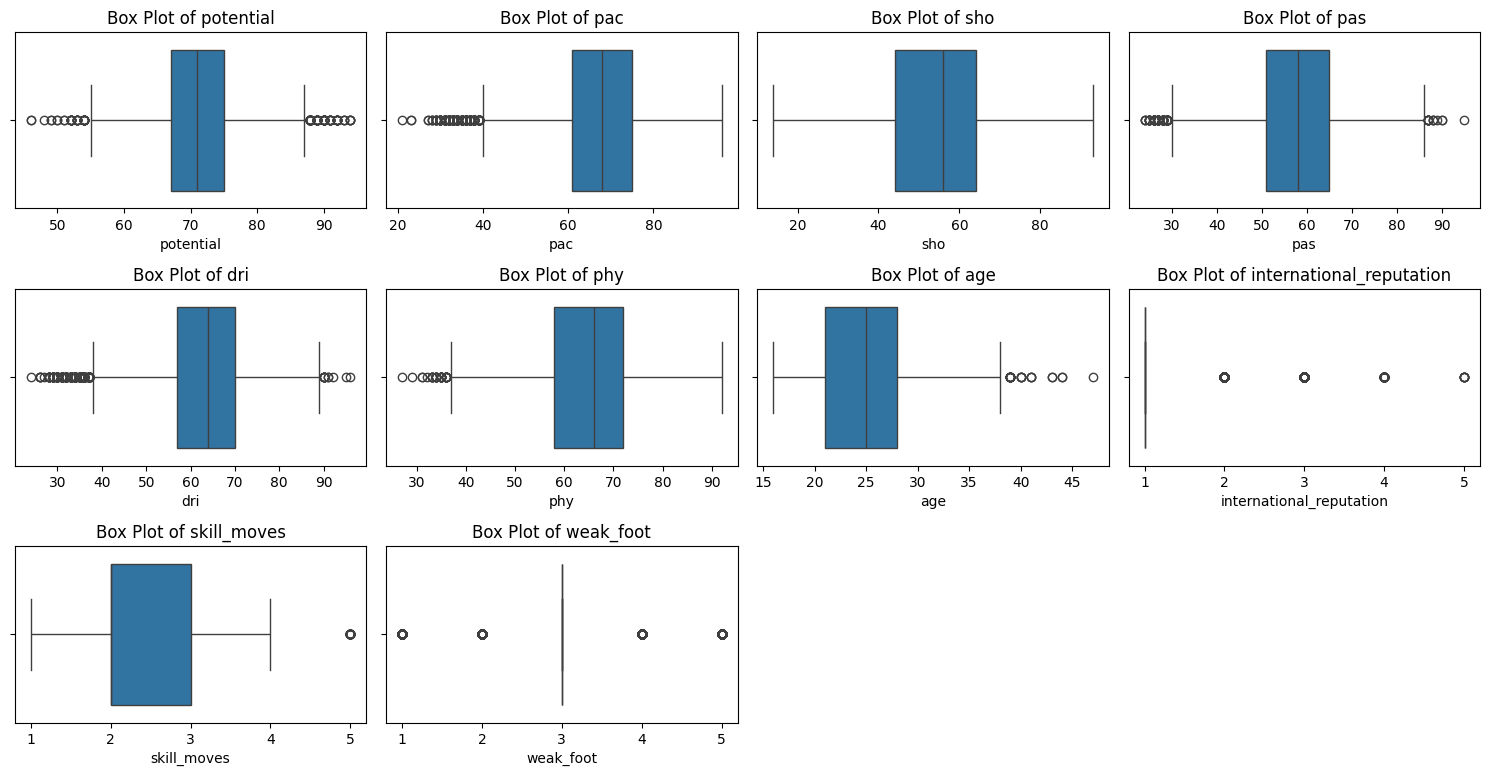

In [15]:
# Analyzing the distribution of numerical features using histograms and box plots
# Identifying numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Setting up the plot for histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Setting up the plot for box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=df, x=col)
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

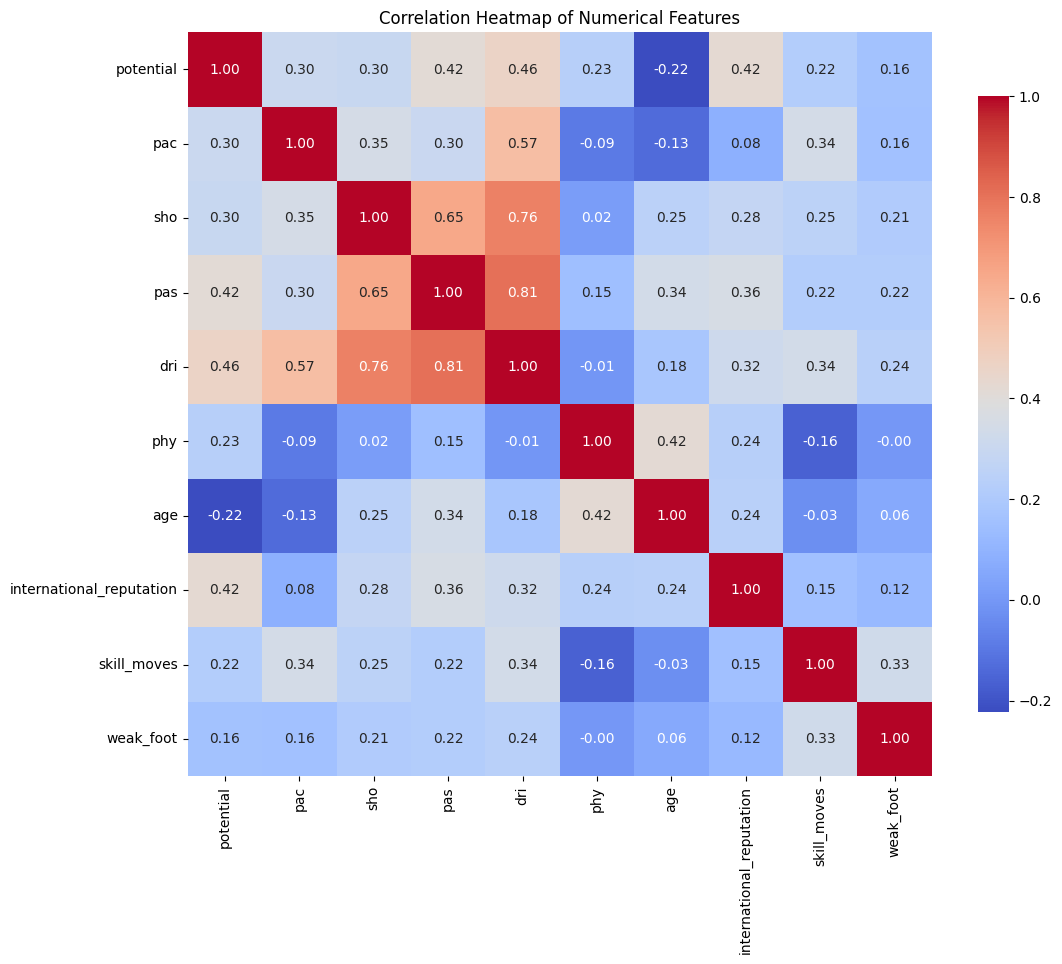

In [18]:
# Checking for correlations between numerical features using a heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={'shrink': .8})
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

<ipython-input-24-8b1c0283db12>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = df_scaled.groupby('target').apply(lambda x: x.sample(df_scaled['target'].value_counts().min(), random_state=42)).reset_index(drop=True)


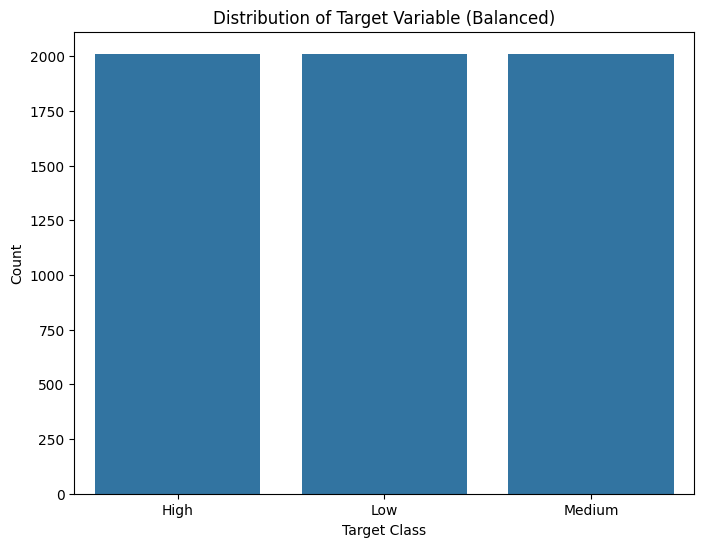

In [24]:
# Balance the dataset by sampling the minimum class size
balanced_df = df_scaled.groupby('target').apply(lambda x: x.sample(df_scaled['target'].value_counts().min(), random_state=42)).reset_index(drop=True)

# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=balanced_df)
plt.title('Distribution of Target Variable (Balanced)')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.savefig('target_distribution.png')
plt.show()

In [65]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Prepare the features and target variable
X = df_scaled.drop('target', axis=1)  # Replace 'target' with your actual target column name
y = df_scaled['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the datasets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(14395, 10) (3599, 10) (14395,) (3599,)


In [66]:
# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Display the classification report
print("Initial Classification Report:\n", classification_report(y_test, y_pred))


Initial Classification Report:
               precision    recall  f1-score   support

        High       0.94      0.96      0.95       391
         Low       0.91      0.88      0.89       576
      Medium       0.97      0.97      0.97      2632

    accuracy                           0.96      3599
   macro avg       0.94      0.94      0.94      3599
weighted avg       0.96      0.96      0.96      3599



In [71]:
# Hyperparameter tuning with limited depth and regularization
param_grid = {
    'n_estimators': [100, 200],  # Keep standard ensemble size
    'max_depth': [10],  # Limit tree depth
    'min_samples_split': [5],  # Require at least 5 samples per split
    'min_samples_leaf': [4],  # Require at least 4 samples per leaf
    'criterion': ['gini', 'entropy']
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [10],
                         'min_samples_leaf': [4], 'min_samples_split': [5],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [72]:
# Use the best model from grid search
best_rf = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best = best_rf.predict(X_test)

# Display the classification report for the best model
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

        High       0.95      0.93      0.94       391
         Low       0.91      0.83      0.87       576
      Medium       0.95      0.97      0.96      2632

    accuracy                           0.95      3599
   macro avg       0.94      0.91      0.92      3599
weighted avg       0.95      0.95      0.95      3599



In [73]:
# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)
print(conf_matrix)

[[ 364    0   27]
 [   0  477   99]
 [  19   47 2566]]


In [74]:
# Calculate training accuracy
train_accuracy = best_rf.score(X_train, y_train)
print("Training Accuracy: ", train_accuracy)

# Calculate test accuracy
test_accuracy = best_rf.score(X_test, y_test)
print("Test Accuracy: ", test_accuracy)

Training Accuracy:  0.9641542202153526
Test Accuracy:  0.946651847735482
